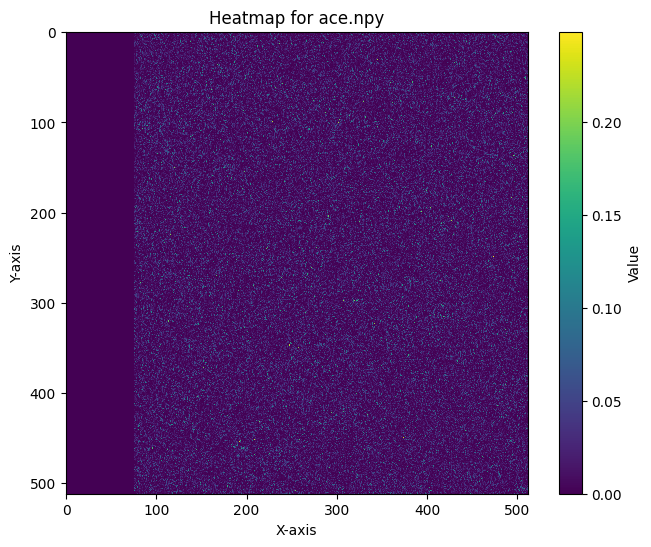

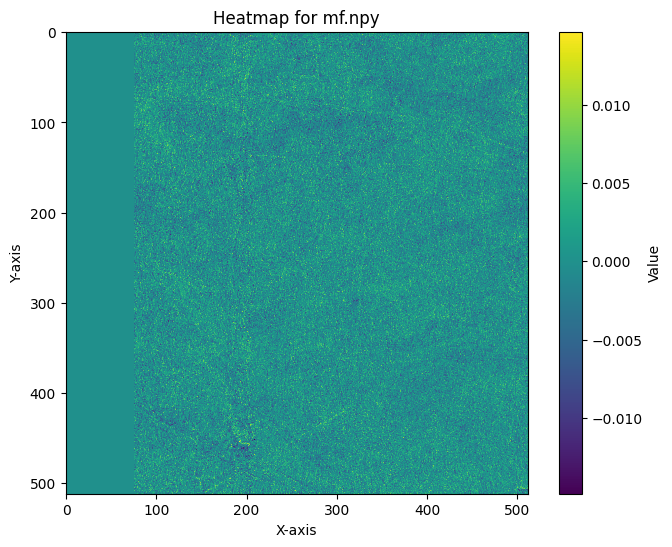

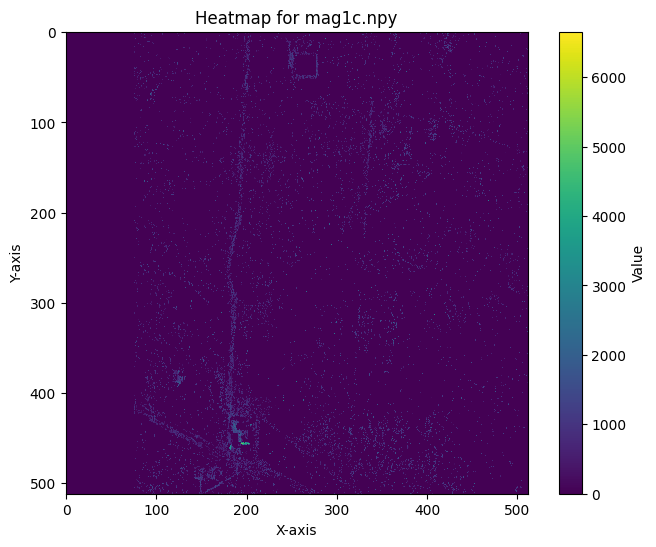

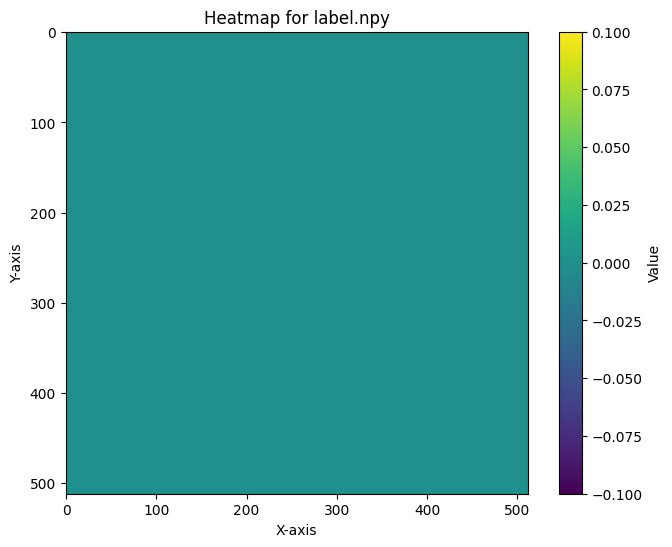

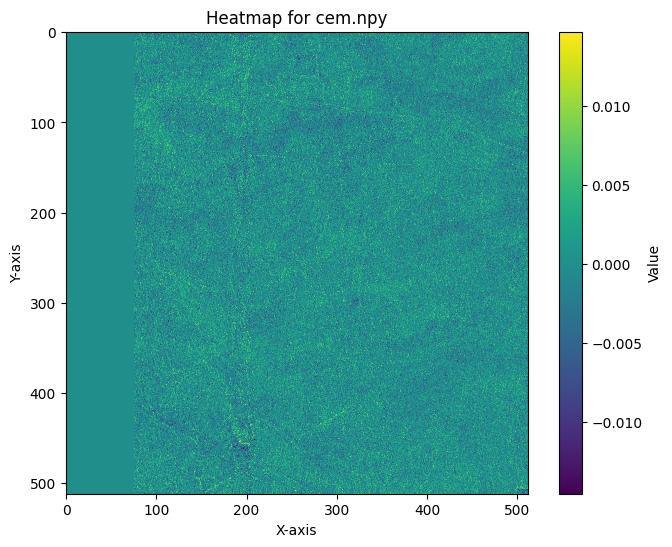

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
#ang20191025t195446_r13089_c251_w151_h151
#ang20191025t171141_r12544_c0_w512_h512
#ang20191025t171141_r10528_c126_w151_h151
# Path to the folder containing the .npy files
path = "data/BY_COLUMNS_STARCOP-MAG1C/ang20191018t144405_r19456_c0_w512_h512"

# Loop through all files in the folder
for filename in os.listdir(path):
    # Check if the file is a .npy file
    if filename.endswith(".npy"):
        file_path = os.path.join(path, filename)
        
        # Load the 2D array from the .npy file
        data = np.load(file_path)
        
        # Create a new figure
        plt.figure(figsize=(8, 6))
        
        # Plot the 2D array as a heatmap
        plt.imshow(data, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Value')
        plt.title(f"Heatmap for {filename}")
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        
        # Show the plot
        plt.show()

In [ ]:
spectrum = np.load("spectrum.npy")
centers = np.load("centers.npy")
print(spectrum)
print(centers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9999.0..32.291378].


-9999.0 37.493042


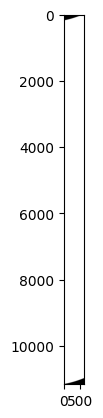

In [2]:
import spectral
import matplotlib.pyplot as plt
path = "ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img"

rdn_file = spectral.io.envi.open(path + ".hdr", path)
rdn_file_npy = rdn_file.load()
print(rdn_file_npy.min(), rdn_file_npy.max())
plt.imshow(rdn_file_npy[:,:,[30,20,10]])

0.0 5.2797136


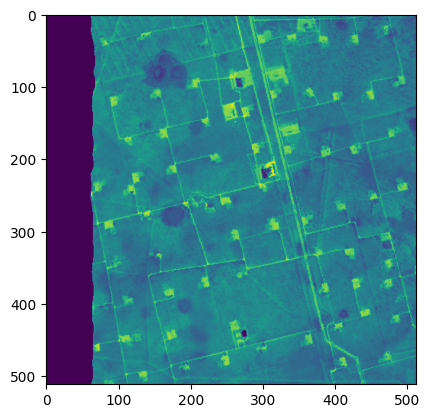

In [4]:
import tifffile as tiff
import matplotlib.pyplot as plt

file = tiff.imread("/home/jherec/starcop_big/STARCOP_allbands/ang20191025t171141_r10528_c126_w151_h151/TOA_AVIRIS_2194nm.tif")
print(file.min(), file.max())
plt.imshow(file)

In [16]:
import spectral.io.envi as envi
import numpy as np
file = envi.open("ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img.hdr", "ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img")
print(file.metadata)
wavelength = file.metadata["wavelength"]
fwhm = file.metadata["fwhm"]
wavelength = [float(f) for f in wavelength]
fwhm = [float(f) for f in fwhm]
print(wavelength)
print(fwhm)

{'description': 'AVIRIS-NG Measured Radiances in uW nm-1 cm-2 sr-1', 'samples': '616', 'lines': '11164', 'bands': '425', 'header offset': '0', 'file type': 'ENVI', 'data type': '4', 'interleave': 'bil', 'byte order': '0', 'map info': ['UTM', '1', '1', '688980.631507', '3588742.29041', '7.3', '7.3', '13', 'North', 'WGS-84', 'units=Meters', 'rotation=-55.0000000'], 'crosstrack scatter file': '/home/winstono/isat-dev/ang/cal/data/20170125_via_ang20160925t182412_crf', 'wavelength units': 'Nanometers', 'flat field file': '/home/winstono/isat-dev/ang/cal/data/20180727_ang20180628_BLUSS_avg_rows300-340_ff', 'wavelength file': '/home/winstono/isat-dev/ang/cal/data/20190111_ang20180325t061759_wavelength_fit_full.txt', 'wavelength': ['376.719576', '381.729576', '386.739576', '391.749576', '396.749576', '401.759576', '406.76957600000003', '411.77957599999996', '416.789576', '421.799576', '426.80957600000005', '431.819576', '436.819576', '441.829576', '446.839576', '451.84957599999996', '456.85957